In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_csv('google.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044
...,...,...,...,...,...,...,...
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,195.399994,67894100
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,191.960007,34817500
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,189.820007,25143500
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,196.660004,44934900


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,195.399994,67894100
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,191.960007,34817500
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,189.820007,25143500
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,196.660004,44934900
5117,2024-12-17,197.250000,201.419998,194.979996,195.419998,195.419998,43482900


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5118.000000,5118.000000,5118.000000,5118.000000,5118.000000,5.118000e+03
mean,47.639701,48.139771,47.149358,47.654613,47.490963,1.157640e+08
std,45.736050,46.241037,45.269941,45.763431,45.621100,1.470189e+08
min,2.482232,2.546046,2.401401,2.502753,2.493713,9.312000e+06
25%,13.176239,13.307683,13.039790,13.182808,13.135192,3.064900e+07
50%,28.003501,28.195346,27.751500,27.969750,27.868724,5.752321e+07
75%,62.746125,63.414874,62.220124,62.900626,62.673431,1.393135e+08
max,197.250000,201.419998,194.979996,196.660004,196.660004,1.643023e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5118 non-null   object 
 1   Open       5118 non-null   float64
 2   High       5118 non-null   float64
 3   Low        5118 non-null   float64
 4   Close      5118 non-null   float64
 5   Adj Close  5118 non-null   float64
 6   Volume     5118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.0+ KB


In [15]:
df.shape

(5118, 7)

In [19]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
stock_price = df['Open'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_price)

In [23]:
X=[]
y=[]
for i in range(60,len(scaled_data)):
  X.append(scaled_data[i-60:i,0])
  y.append(scaled_data[i,0])

In [25]:
X=np.array(X)
y=np.array(y)
X=np.reshape(X , (X.shape[0],X.shape[1],1))

In [27]:
from tensorflow.keras.layers import SimpleRNN, Dense , Dropout
model = tf.keras.Sequential ([
    SimpleRNN (units=50 , return_sequences = True , input_shape=(X.shape[1],1)),
    Dropout(0.2),
    SimpleRNN(units = 50),
    Dropout(0.2),
    Dense(1)
])

C:\Users\RUTURAJ\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    optimizer = 'adam',
    loss = "mean_squared_error"
)

In [31]:
history = model.fit(X,y,epochs=50,batch_size=32, validation_split=0.2)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0325 - val_loss: 0.0050
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 8.5662e-04 - val_loss: 0.0035
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 7.7313e-04 - val_loss: 0.0012
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 6.2306e-04 - val_loss: 0.0030
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6635e-04 - val_loss: 0.0031
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.8403e-04 - val_loss: 7.3619e-04
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4117e-04 - val_loss: 0.0022
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.2669e-04 - val_loss: 0.0020
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9805e-04 - val_loss: 4.8193e-04
E

In [33]:
predicted_stock_price = model(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [35]:
actual_stock_price = scaler.inverse_transform(y.reshape(-1,1))

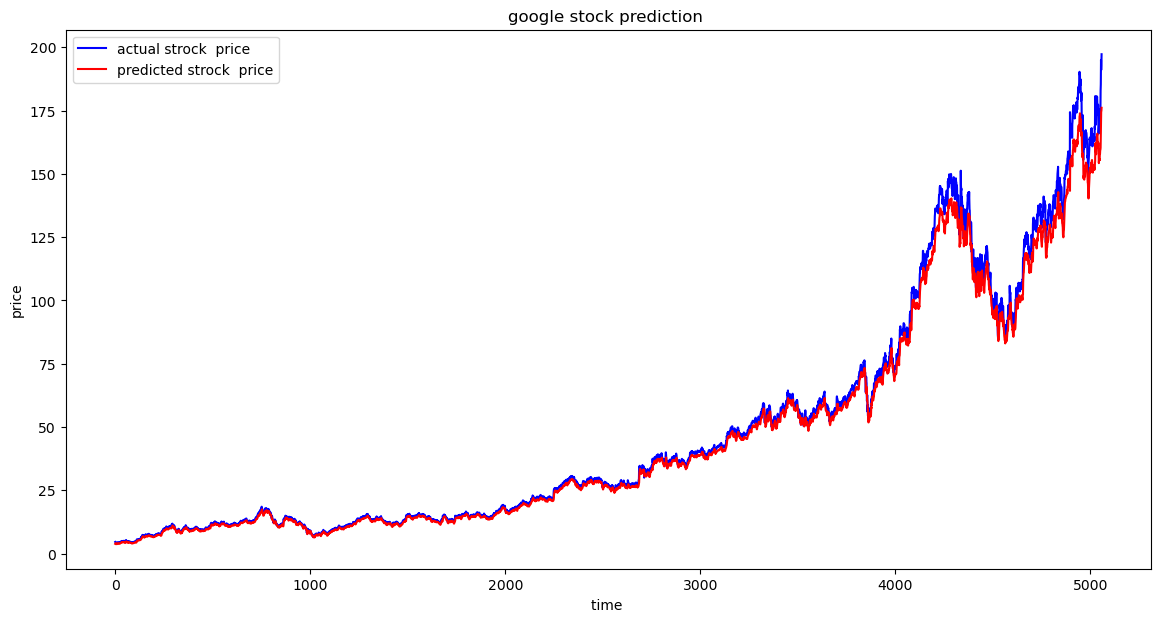

In [37]:
plt.figure(figsize=(14,7))
plt.plot(actual_stock_price , color='blue' , label='actual strock  price')
plt.plot(predicted_stock_price , color='red' , label='predicted strock  price')
plt.title("google stock prediction ")
plt.xlabel("time ")
plt.ylabel("price")
plt.legend()
plt.show()


In [39]:
from tensorflow.keras.layers import LSTM

regressor = tf.keras.Sequential([
    LSTM( units=4 , activation = 'sigmoid', input_shape=(None , 1)),
    Dense(units =1 )
])

C:\Users\RUTURAJ\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
regressor.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [43]:
regressor.fit(X,y,batch_size=32,epochs=20)

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0471
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0315
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0149
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0027e-04
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3035e-04
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3174e-04
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2185e-04
Epoch 9/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.1083e-04
Epoch 10/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0302e-04
Epoch 11/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0728e-04
Epoch 12/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1381e-04
Epoch 13/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1293e-04
Epoch 14/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 9.7012e-05
Epo

In [45]:
actual_stock_price = scaler.inverse_transform(y.reshape(-1,1))

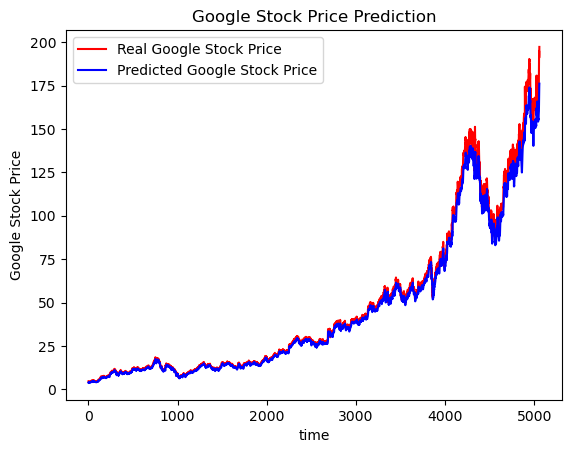

In [47]:
 plt.plot( actual_stock_price , color = 'red' , label = 'Real Google Stock Price')
 plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
 plt.title('Google Stock Price Prediction')
 plt.xlabel( 'time' )
 plt.ylabel( 'Google Stock Price' )
 plt.legend()
 plt.show()